# Project Description


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Loading the Dataset

In [2]:
data=pd.read_csv('loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# checking shapes

data.shape

(614, 13)

In [4]:
# Observations:

# This Dataset has 614 rows and 13 columns. Let's study the column's names and their charectaristics.

In [5]:
# checking columns names

data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# About Columns-

# 1.Loan_ID-This column gives the ID number of loan.

# 2.Gender-This column reveals the gender type male/female/other.

# 3.Married-This column gives the marital status.

# 4.Dependents-This column gives the number of person dependent

# 5.Education-This column gives the information about education.

# 6.Self-Employed-This column tells about the person is self employed or not

# 7.ApplicantIncome-This column tells about the toatal income of person.

# 8.CoapplicantIncome-This column gives the information about coapplicant income.

# 9.LoanAmount-This column gives the information about the total amount of loan.

# 10.Loan_Amount_Term-This column tells about the loan amount term on loan amount.

# 11.Credit_History-This column gives the information about credit of a loan.

# 12.Property_Area-This column gives the information of area of the property for loan.

# 13.Loan_status-This column tells the loan status in terms of yes/no

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Observations:

# 1) Among 13 columns, there are 4 float values, 8 are object types and 1 is int datatype.

# 2) Null are present in the overall dataset.

# 3) There is one target variable , Loan_Status.

# 4) Loan_Status is a categorical data, needs classification model to predict this.

# Data Integrity Check

In [9]:
# Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

In [10]:
data.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [11]:
# Observations:

# No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe

# Duplicate Values Check

In [12]:
data.duplicated().sum()

0

In [13]:
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [14]:
# Observations:

# No duplicate values present in the dataframe

# Checking Null:

In [15]:
#checking null values

null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values'))

missing value details 

                    Null Values  Null Values percentage
Loan_ID                      0                0.000000
Education                    0                0.000000
ApplicantIncome              0                0.000000
CoapplicantIncome            0                0.000000
Property_Area                0                0.000000
Loan_Status                  0                0.000000
Married                      3                0.488599
Gender                      13                2.117264
Loan_Amount_Term            14                2.280130
Dependents                  15                2.442997
LoanAmount                  22                3.583062
Self_Employed               32                5.211726
Credit_History              50                8.143322


<AxesSubplot:>

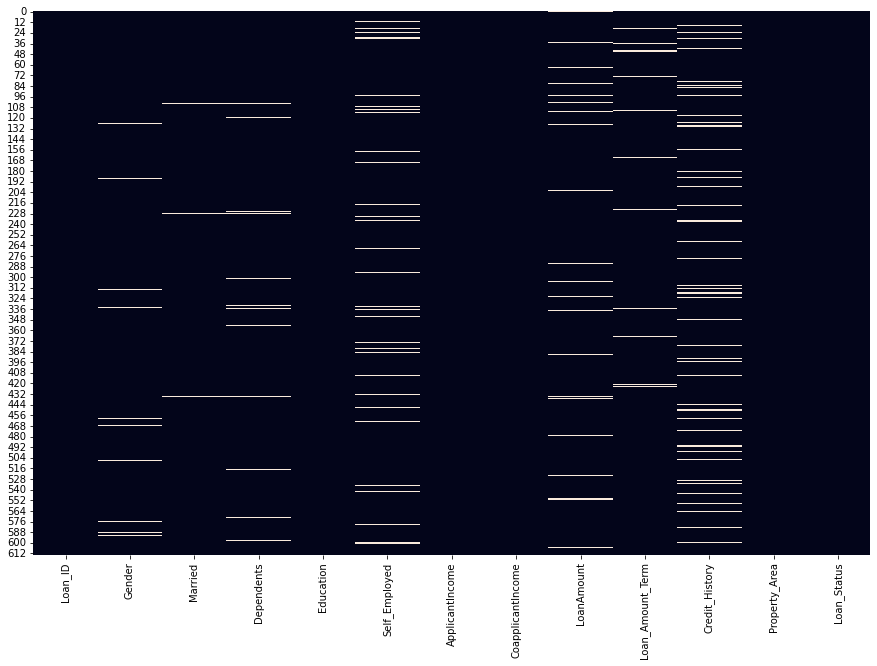

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(),cbar=False)

In [17]:
# Observations:

# Null values are present in the total dataset.

# Credit_History and Self_Employed have 8 % and 5% highest missing data, need to impute this.

# Married, Gender ,Loan_Amount_Term, Dependents , LoanAmount have also missing data

In [18]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [19]:
# Observation:

# 1) Loan_ID is a categorical data with different entries for every individual dataset.


# 2) Gender, Married, Education , Self_Employed,loan_status and Credit_History  has 2 categories



# Imputation of missing values:

In [20]:
# Let's Impute Missing values. Before imputing this first explore all Categorical and numarical data.

# Categorical data imputation:

In [21]:
print (data["Married"].value_counts())
print ("Mode is ",data["Married"].mode()[0])

Yes    398
No     213
Name: Married, dtype: int64
Mode is  Yes


In [22]:
print (data["Gender"].value_counts())
print ("Mode is ",data["Gender"].mode()[0])

Male      489
Female    112
Name: Gender, dtype: int64
Mode is  Male


In [23]:
print (data["Dependents"].value_counts())
print ("Mode is ",data["Dependents"].mode()[0])

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Mode is  0


In [24]:
print (data["Self_Employed"].value_counts())
print ("Mode is ",data["Self_Employed"].mode()[0])

No     500
Yes     82
Name: Self_Employed, dtype: int64
Mode is  No


In [25]:
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [26]:
print (data["Married"].isna().sum())
print (data["Gender"].isna().sum())
print (data["Dependents"].isna().sum())
print (data["Self_Employed"].isna().sum())

0
0
0
0


In [27]:
# Observations:

# All categorical data in imputed by mode. Let's impute numarical data.

# Numerical data imputations:

In [28]:
print (data["Loan_Amount_Term"].value_counts())


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [29]:
# Observations:

# As Loan_Amount_Term has some discrete values, let's impute this with mode()

In [30]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
print (data["Loan_Amount_Term"].isna().sum())

0


In [31]:
print (data["Credit_History"].value_counts())
data["Credit_History"].unique()

1.0    475
0.0     89
Name: Credit_History, dtype: int64


array([ 1.,  0., nan])

In [32]:
# Observations:

# As Credit_History has some discrete values, let's impute this also with mode()

In [33]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
print (data["Credit_History"].isna().sum())

0


In [34]:
# LoanAmount is a continuous variable. Let's visualize this.

Text(0, 0.5, 'LoanAmount')

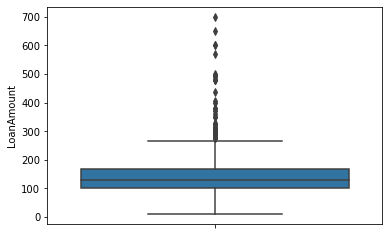

In [35]:
sns.boxplot( y='LoanAmount', data=data)
plt.ylabel('LoanAmount')

In [36]:
print("Mean of Loan Amount:",data['LoanAmount'].mean())
print("Median of Loan Amount:",data['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


In [37]:
# observations:

# Here outliers is also present. If outliers exists, the imputation technique will be median.

# And here also, the mean is greater than median LoanAmount and let's impute missing values in LoanAmount with median.



In [38]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [39]:
#checking null values

null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values'))

missing value details 

                    Null Values  Null Values percentage
Loan_ID                      0                     0.0
Gender                       0                     0.0
Married                      0                     0.0
Dependents                   0                     0.0
Education                    0                     0.0
Self_Employed                0                     0.0
ApplicantIncome              0                     0.0
CoapplicantIncome            0                     0.0
LoanAmount                   0                     0.0
Loan_Amount_Term             0                     0.0
Credit_History               0                     0.0
Property_Area                0                     0.0
Loan_Status                  0                     0.0


In [40]:
# Observations:

# Our dataset is free from null.

# Statistical features:

In [41]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [42]:
# Observations:

# 1) No null values are present.

# 2) As there is a big difference between 75% and max value of
#ApplicantIncome, CoapplicantIncome and LoanAmount column, there may be some outliers.

# 3) For ApplicantIncome & CoapplicantIncome, Std deviation is greater than mean. Seems skewness is present.

# 4) As Credit_History is categorical data , there is no differece between different statstical parameter of it.

# 5) Min loan amount is 9 and max is 700.


# Let's drop the unnecessary column

In [43]:
data["Loan_ID"].nunique()

614

In [44]:
data.drop(["Loan_ID"], axis=1, inplace=True)

In [45]:
# Loan_ID has 614 different entry for each row, So I removed it before further process.

# Exploratory data analysis(EDA):

In [46]:
# Exploration of categorical features ("Loan_Amount_Term", "Credit_History" are also discrete data):

# Though "Loan_Amount_Term", "Credit_History" is numarical data but it has discrete datatype 
#so this analysis similar to categorical data

# Univariate Analysis

In [47]:
cat=["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area","Loan_Amount_Term", "Credit_History"]


Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

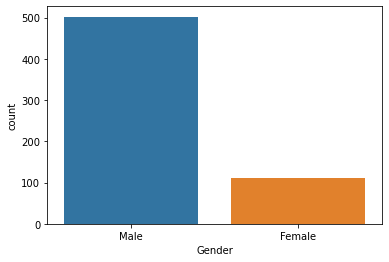

In [48]:
print(data['Gender'].value_counts())
sns.countplot('Gender',data=data)

In [49]:
# Male applicant is more compare to Female applicant

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

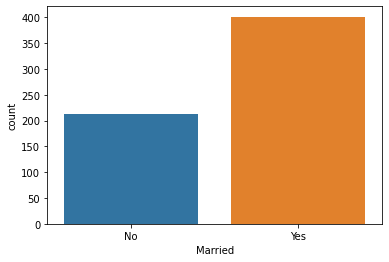

In [50]:
print(data['Married'].value_counts())
sns.countplot('Married',data=data)

In [51]:
# Married applicant are more compare to unmarried applicant

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

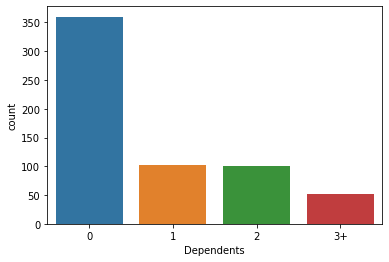

In [52]:
print(data['Dependents'].value_counts())
sns.countplot('Dependents',data=data)

In [53]:
# Dependent 0 is more than dependents1,dependent 1 is more than dependent2 
#and dependent 2 is more than dependent 3+ of applicants.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

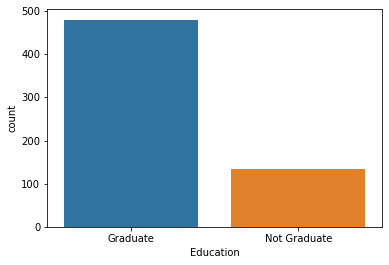

In [54]:
print(data['Education'].value_counts())
sns.countplot('Education',data=data)

In [55]:
# Graduate applicant are more compare to not graduate applicant

No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

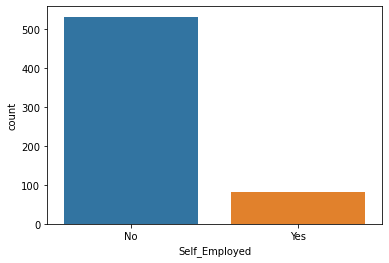

In [56]:
print(data['Self_Employed'].value_counts())
sns.countplot('Self_Employed',data=data)

In [57]:
# Not Self_Employed Applicant are more compare to self_Employed Applicant.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

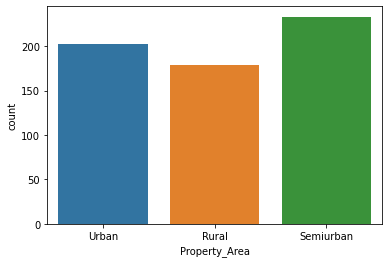

In [58]:
print(data['Property_Area'].value_counts())
sns.countplot('Property_Area',data=data)

In [59]:
# Semiurban property of applicant are more compare to uraban and rural



<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

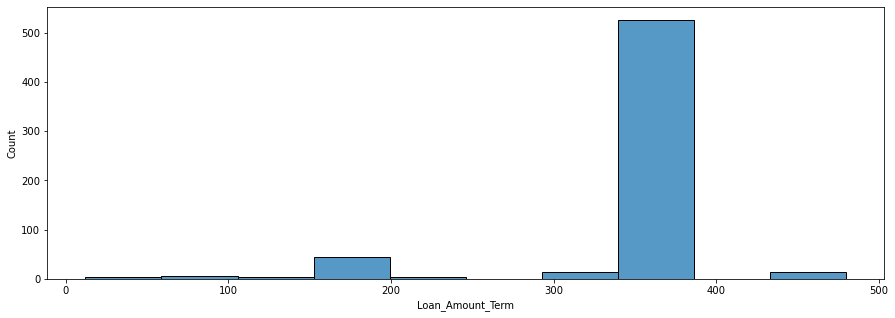

In [60]:
# Loan_ Amount_Term

plt.figure(figsize=(15,5))
sns.histplot(x='Loan_Amount_Term',data=data,bins=10)

In [61]:
# Loan Amount Term is between 330 months to 380 months are applied by more than 500 applicant
#and between 10 months to 60 months and between 200 months to 250 months are applied by 5/10 applicant

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

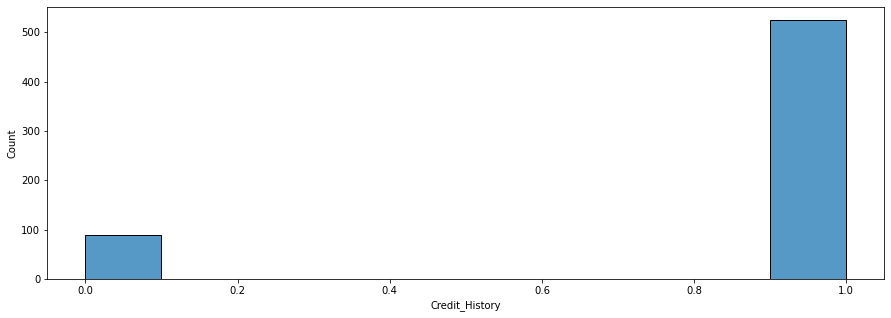

In [62]:
# Credit_History
plt.figure(figsize=(15,5))
sns.histplot(x='Credit_History',data=data,bins=10)


In [63]:
# Credit_History of Applicant between 0.9 to 1.0 is of more than 450 applicant
# and between 0.1 to 0.8 there are no applicant between 0.8 to 0.9 there are 50 applicants.

In [64]:
for i in cat:
    x= data[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("="*20)

Value counts of Gender is---
 Male      502
Female    112
Name: Gender, dtype: int64
Value counts of Married is---
 Yes    401
No     213
Name: Married, dtype: int64
Value counts of Dependents is---
 0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Value counts of Education is---
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Value counts of Self_Employed is---
 No     532
Yes     82
Name: Self_Employed, dtype: int64
Value counts of Property_Area is---
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Value counts of Loan_Amount_Term is---
 360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Value counts of Credit_History is---
 1.0    525
0.0     89
Name: Credit_History, dtype: int64


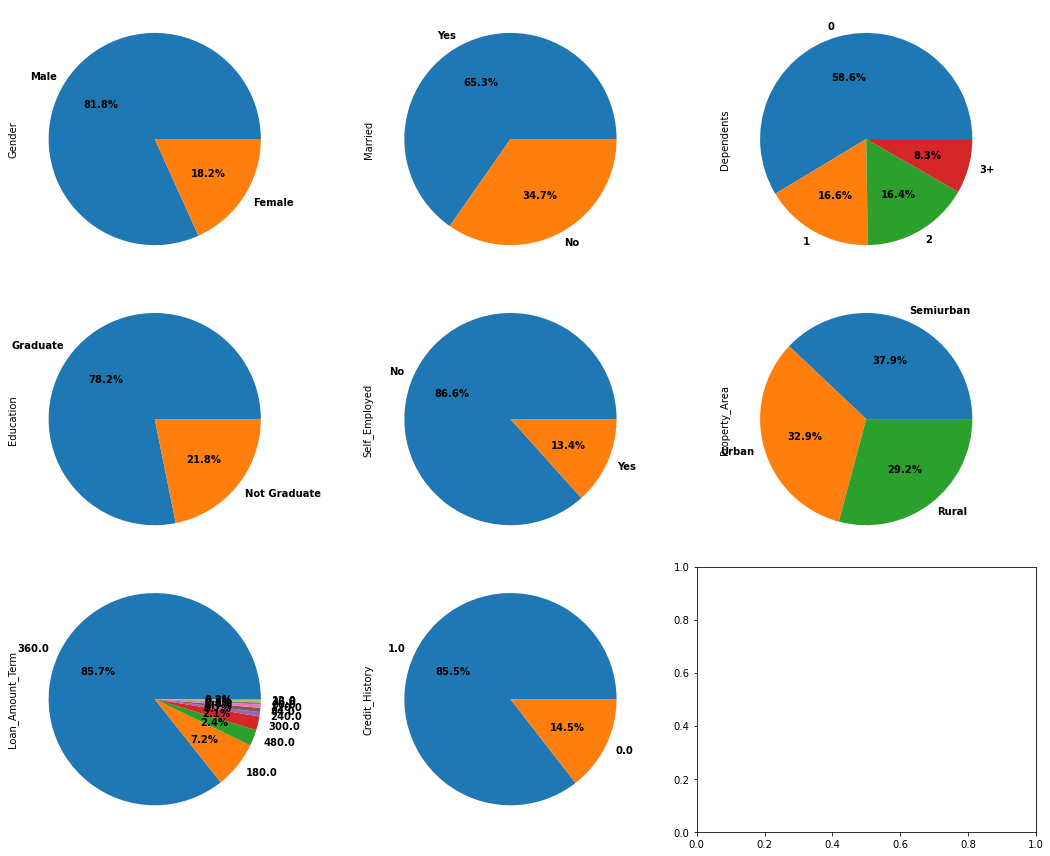

In [65]:
fig,axes=plt.subplots(3,3,figsize=(15,12))

data['Gender'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=axes[0,0])
data['Married'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=axes[0,1])
data['Dependents'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=axes[0,2])
data['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=axes[1,0])
data['Self_Employed'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=axes[1,1])
data['Property_Area'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=axes[1,2])
data['Loan_Amount_Term'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=axes[2,0])
data['Credit_History'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=axes[2,1])
plt.tight_layout()
plt.show()

# Analysis of Numarical variable:

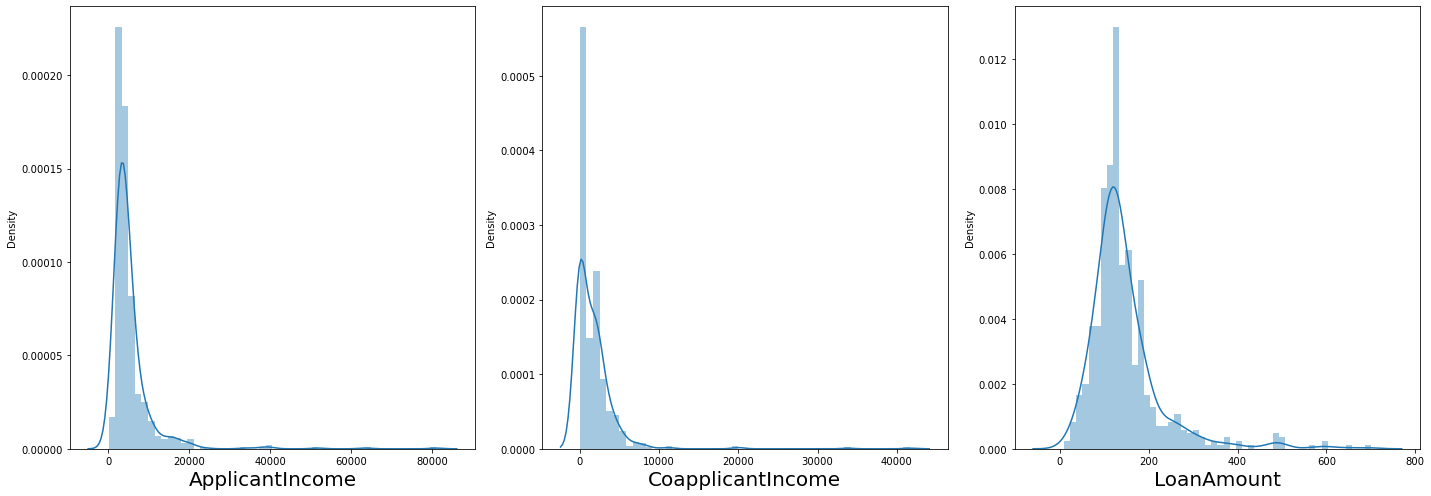

In [66]:
#distribution of numerical features.

data_num = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]
i=0
plt.figure(figsize=(20,7))
for p in data_num.columns:
    plt.subplot(1,3,i+1)
    sns.distplot(data_num[p], bins=50)
    plt.xlabel(p,fontsize=20)
    i+=1  
plt.tight_layout()

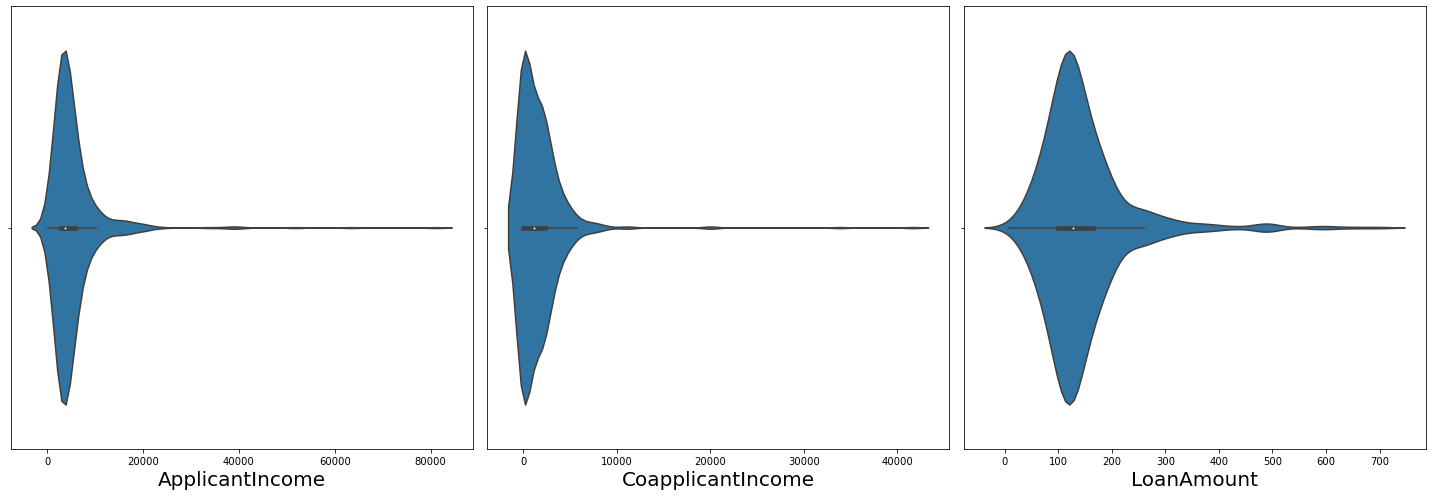

In [67]:
i=0
plt.figure(figsize=(20,7))
for p in data_num.columns:
    plt.subplot(1,3,i+1)
    sns.violinplot(data_num[p])
    plt.xlabel(p,fontsize=20)
    i+=1
plt.tight_layout()

In [68]:
# Observations:

# 1) Avg range of ApplicantIncome is 0-20000.

# 2) Avg range of CoapplicantIncome is 0-10000.

# 3) Avg range of loan amount is 100-300

# 4) All the data are right skewed

# 5) outliers are present.

# 6) For ApplicantIncome and CoapplicantIncome there is a huge number of 0 values

# Analysis of Target feature:

In [69]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

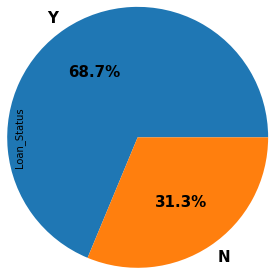

In [70]:
data['Loan_Status'].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

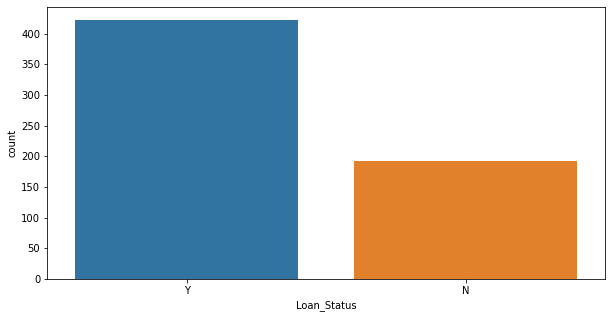

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(data['Loan_Status'])
plt.show()

In [72]:
# Observations:

# The max Loan_Status type is Y with 68.7%

# There are only two types of Loan_Status, Y or N.

# Bivariate Analysis:

In [73]:
# Different categorical features on Loan_Status:

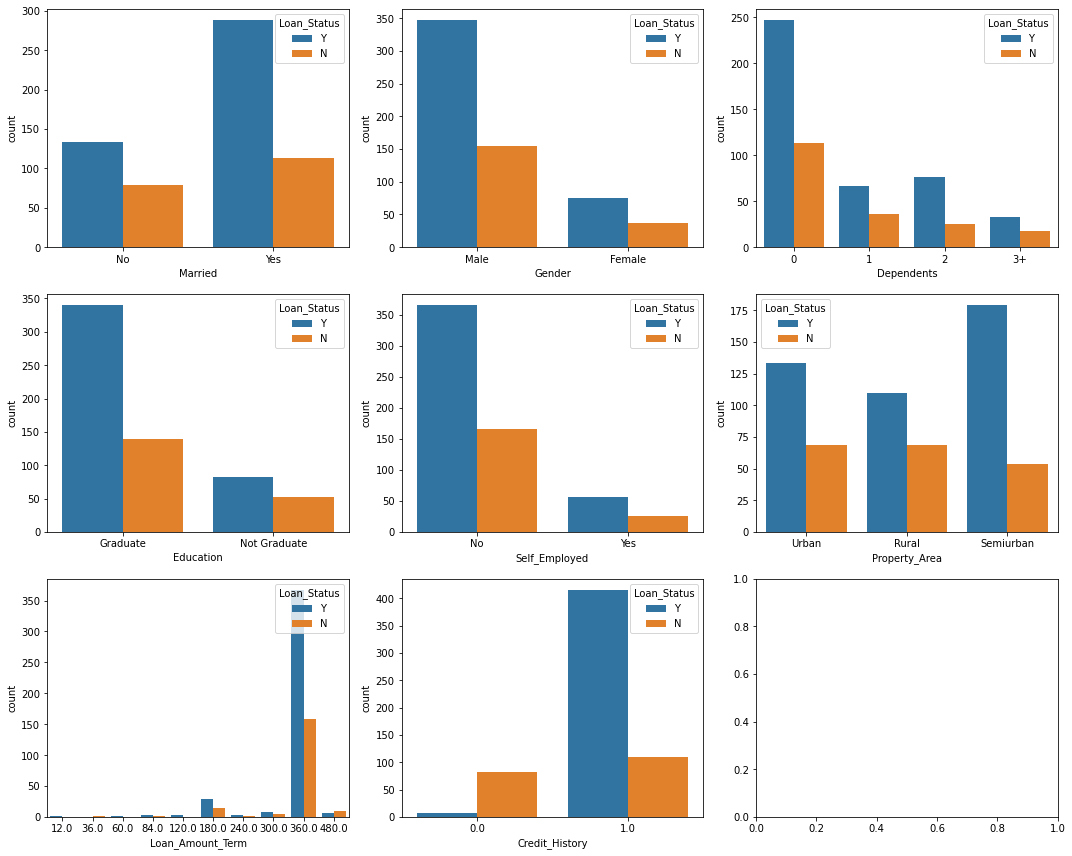

In [74]:
fig,axes=plt.subplots(3,3,figsize=(15,12))

sns.countplot('Married',hue="Loan_Status", data= data, ax=axes[0,0])
sns.countplot('Gender',hue="Loan_Status", data= data, ax=axes[0,1] )
sns.countplot('Dependents',hue="Loan_Status", data= data, ax=axes[0,2] )
sns.countplot('Education',hue="Loan_Status", data= data, ax=axes[1,0] )
sns.countplot('Self_Employed',hue="Loan_Status", data= data, ax=axes[1,1])
sns.countplot('Property_Area',hue="Loan_Status", data= data, ax=axes[1,2])
sns.countplot('Loan_Amount_Term',hue="Loan_Status", data= data, ax=axes[2,0] )
sns.countplot('Credit_History',hue="Loan_Status", data= data, ax=axes[2,1] )

plt.tight_layout()
plt.show()

In [75]:
for i in cat:
    print(pd.crosstab(data[i],data["Loan_Status"], margins=True))
    print("================"*2)

Loan_Status    N    Y  All
Gender                    
Female        37   75  112
Male         155  347  502
All          192  422  614
Loan_Status    N    Y  All
Married                   
No            79  134  213
Yes          113  288  401
All          192  422  614
Loan_Status    N    Y  All
Dependents                
0            113  247  360
1             36   66  102
2             25   76  101
3+            18   33   51
All          192  422  614
Loan_Status     N    Y  All
Education                  
Graduate      140  340  480
Not Graduate   52   82  134
All           192  422  614
Loan_Status      N    Y  All
Self_Employed               
No             166  366  532
Yes             26   56   82
All            192  422  614
Loan_Status      N    Y  All
Property_Area               
Rural           69  110  179
Semiurban       54  179  233
Urban           69  133  202
All            192  422  614
Loan_Status         N    Y  All
Loan_Amount_Term               
12.0              

In [76]:
# Observations:

# 1) The positive loan_status is 0.67% for female and 0.69% for male. 
# On an avg arround 68% applicant's loan is considered among all.
#It means that gender doesnot play any role on loan approval.

# 2) Max applicant are Yes loan status with maried status Y

# 3) For credit history 0, the Max applicant are with loan status No.

# 4) The max loan_amount_term is 360.0

# 5) Irrespective Gender 65 % Applicant from each gender gets loan approval.

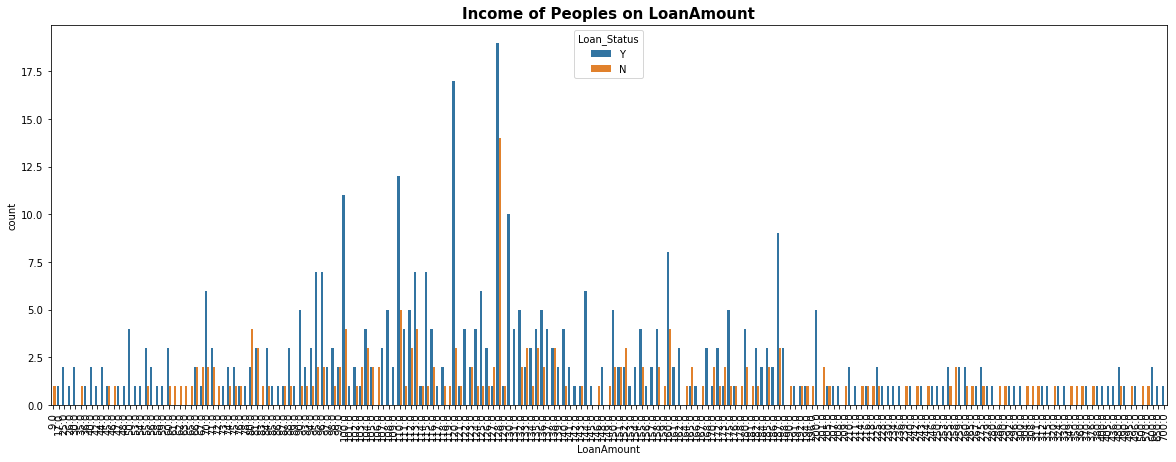

In [77]:
plt.figure(figsize=(20,7))
sns.countplot(data['LoanAmount'], hue=data['Loan_Status'])
plt.title('Income of Peoples on LoanAmount', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('LoanAmount')
plt.xticks(fontsize=10,rotation=90)
plt.show()

In [78]:
# Observations:

# Data range of loan amount is 100-150

In [79]:
pd.crosstab([data['Dependents'], data["Gender"]],[data.Loan_Status],margins=True)

Loan_Status          N    Y  All
Dependents Gender               
0          Female   27   56   83
           Male     86  191  277
1          Female    6   13   19
           Male     30   53   83
2          Female    2    5    7
           Male     23   71   94
3+         Female    2    1    3
           Male     16   32   48
All                192  422  614

In [80]:
pd.crosstab([data['Loan_Amount_Term']],[data.Loan_Status,data['Gender']],margins=True)

Loan_Status           N           Y       All
Gender           Female Male Female Male     
Loan_Amount_Term                             
12.0                  0    0      0    1    1
36.0                  1    1      0    0    2
60.0                  0    0      0    2    2
84.0                  0    1      1    2    4
120.0                 0    0      0    3    3
180.0                 1   14      2   27   44
240.0                 0    1      1    2    4
300.0                 1    4      0    8   13
360.0                32  127     69  298  526
480.0                 2    7      2    4   15
All                  37  155     75  347  614

In [81]:
# Observations:

# 1) It will be interesting to check that , if dependent number is increased, their is increase in requirement loan amount.

# 2) For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

# 3) only 1 application for Loan_Amount_Term 12 is submitted by male and it is approved.

# 4) Female having dependent number 0 have more chances to get loan approval compare to females with dependents.


In [82]:
pd.crosstab([data['Married'],data["Loan_Status"]],[data['Gender']],margins=True)

Gender               Female  Male  All
Married Loan_Status                   
No      N                29    50   79
        Y                51    83  134
Yes     N                 8   105  113
        Y                24   264  288
All                     112   502  614

In [83]:
pd.crosstab([data['Gender'],data['Education']],[data["Loan_Status"]],margins=True)

Loan_Status            N    Y  All
Gender Education                  
Female Graduate       31   61   92
       Not Graduate    6   14   20
Male   Graduate      109  279  388
       Not Graduate   46   68  114
All                  192  422  614

In [84]:
# Observations:

# 1) Unmarried women are more chances of loan approval compare to married women.

# 2) Married men are more chances of loan approval compare to unmarried men.

# 3) If the applicants are graduate, they are getting loan approval very easily.

In [85]:
pd.crosstab([data['Credit_History'],data['Property_Area'],data['Married'] ],[data["Loan_Status"]],margins=True)

Loan_Status                             N    Y  All
Credit_History Property_Area Married               
0.0            Rural         No         7    1    8
                             Yes       19    1   20
               Semiurban     No        10    2   12
                             Yes       16    2   18
               Urban         No        12    0   12
                             Yes       18    1   19
1.0            Rural         No        18   37   55
                             Yes       25   71   96
               Semiurban     No        14   54   68
                             Yes       14  121  135
               Urban         No        18   40   58
                             Yes       21   92  113
All                                   192  422  614

In [86]:
# Observations:

# If credit histry is 0 and property area is Urban the loan status is No (if the applicant is not married ) 
# and only 1 is Yes (if the applicant is married ).


# Multivariate Analysis

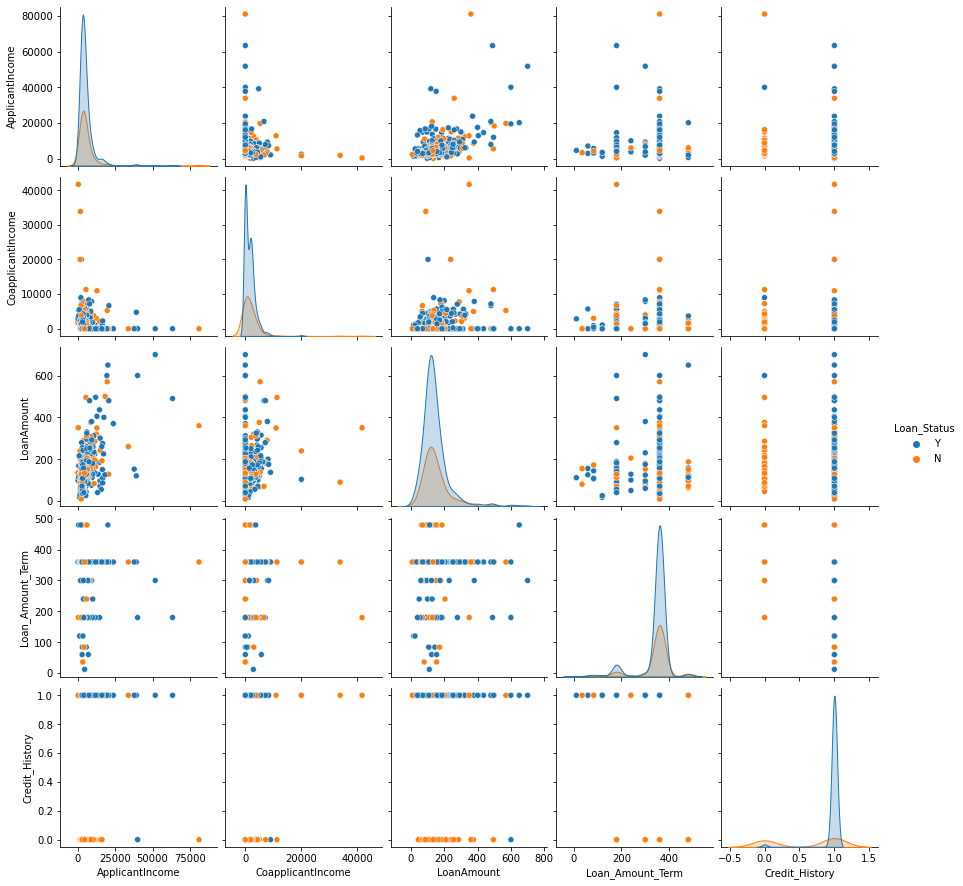

In [87]:
sns.pairplot(data,hue='Loan_Status')

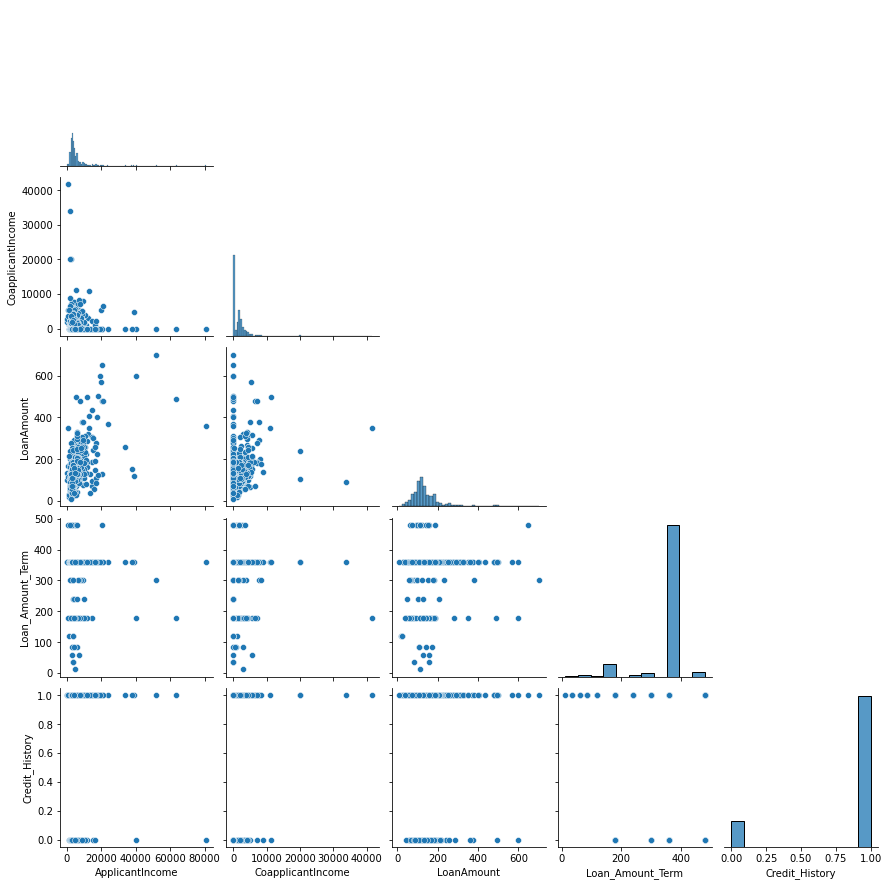

In [88]:
sns.pairplot(data, kind='scatter', corner=True)
plt.show()

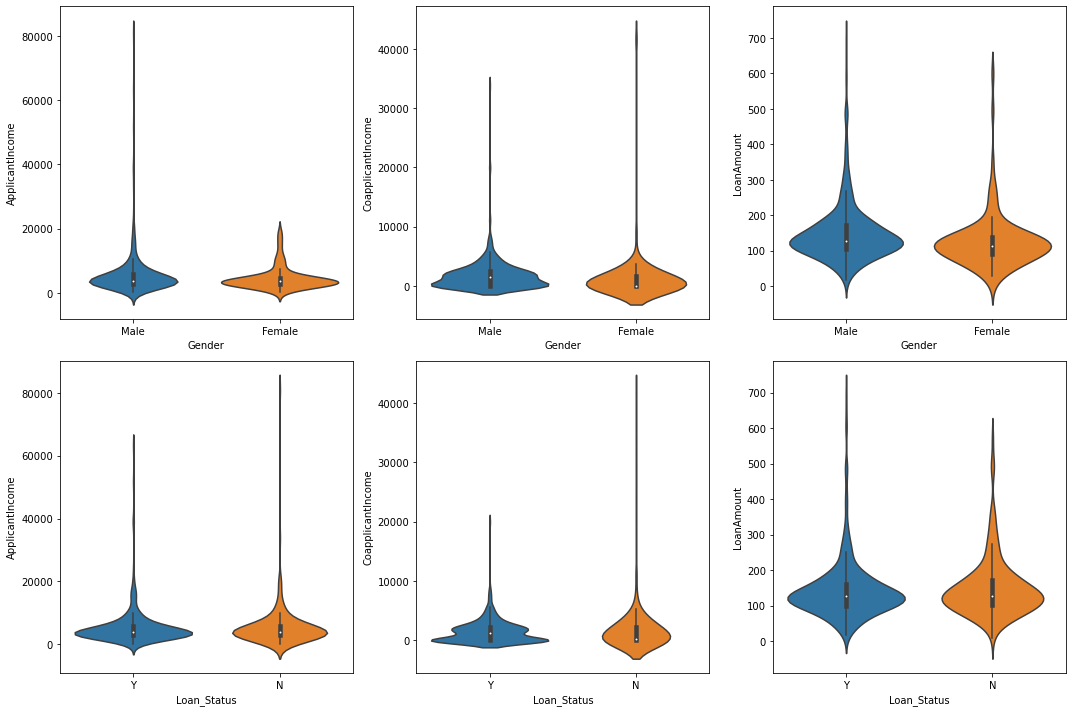

In [89]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

sns.violinplot(x = data['Gender'], y = data['ApplicantIncome'], data = data, ax=axes[0,0])
sns.violinplot(x = data['Gender'], y = data['CoapplicantIncome'], data = data, ax=axes[0,1])
sns.violinplot(x = data['Gender'], y = data['LoanAmount'], data = data, ax=axes[0,2])

sns.violinplot(x = data['Loan_Status'], y = data['ApplicantIncome'], data = data, ax=axes[1,0])
sns.violinplot(x = data['Loan_Status'], y = data['CoapplicantIncome'], data = data, ax=axes[1,1])
sns.violinplot(x = data['Loan_Status'], y = data['LoanAmount'], data = data, ax=axes[1,2])

plt.tight_layout()
plt.show()

In [90]:
# Observations:

# 1) Data distribution pattern with different numarical features and gender column is simillar.

# 2) Data distribution pattern with different numarical features and loan status column is slight different for two types.


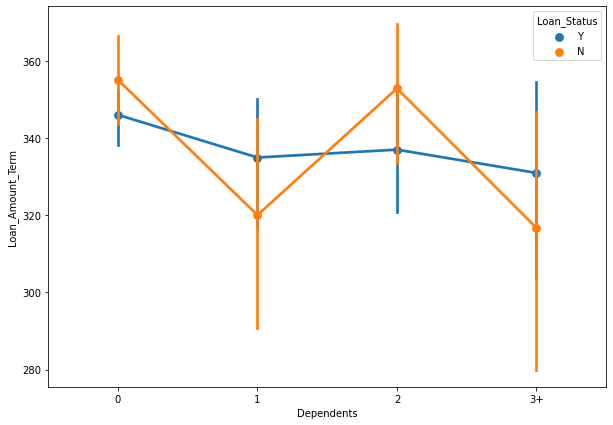

In [91]:
plt.figure(figsize=(10,7))
sns.pointplot(x = data['Dependents'], y = data['Loan_Amount_Term'], data = data,  hue= data['Loan_Status'])
plt.show()


In [92]:
# Observations:

# No such relation observed from this graph

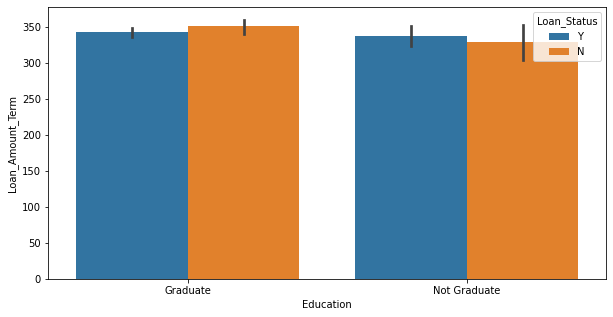

In [93]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['Education'], y = data['Loan_Amount_Term'], data = data,  hue= data['Loan_Status'])
plt.show()

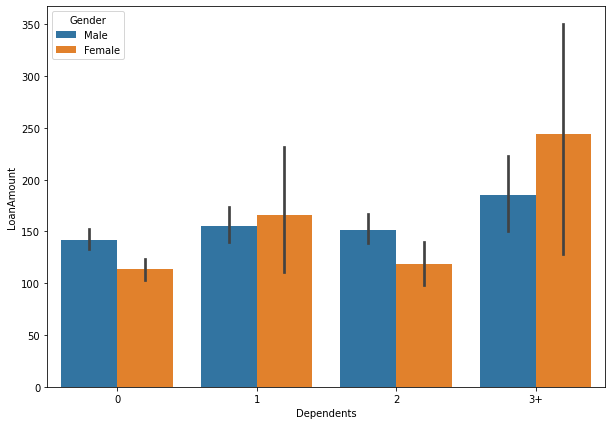

In [94]:
plt.figure(figsize=(10,7))
sns.barplot(x = data['Dependents'], y = data['LoanAmount'], data = data,  hue= data['Gender'])
plt.show()

In [95]:
# Observations:

# Total number of Yes Loan_Status is maximum for graduate applicants.

# If number of dependent increased, then the loan amount also increased.

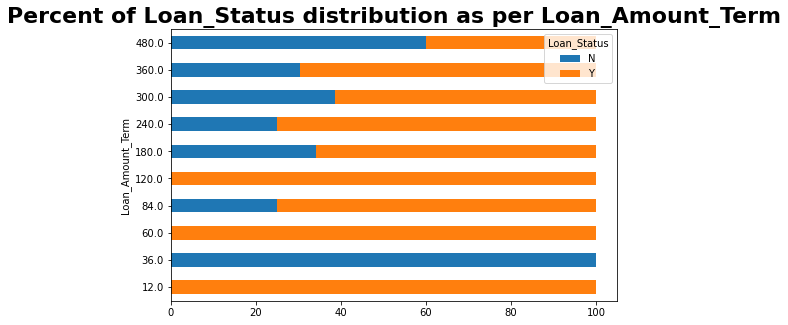

In [96]:
table= pd.crosstab(data['Loan_Amount_Term'], data['Loan_Status'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,5))
plt.title('Percent of Loan_Status distribution as per Loan_Amount_Term', fontsize=22, fontweight='bold')
plt.show()

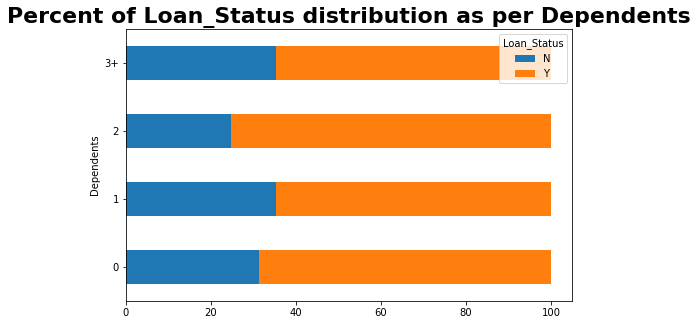

In [97]:
table= pd.crosstab(data['Dependents'], data['Loan_Status'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,5))
plt.title('Percent of Loan_Status distribution as per Dependents', fontsize=22, fontweight='bold')
plt.show()

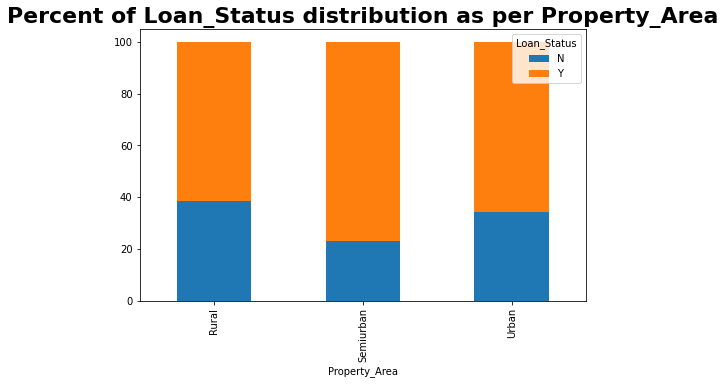

In [98]:
table= pd.crosstab(data['Property_Area'], data['Loan_Status'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True, figsize=(8,5))
plt.title('Percent of Loan_Status distribution as per Property_Area', fontsize=22, fontweight='bold')
plt.show()

In [99]:
#Observations:

# For Loan_Amount_Term 120,60 and 12, all loan are sanctioned

# For Loan_Amount_Term 36, no loan is sanctioned

# Max number of santioned loan is from semi urban area

# Encoding categorical data:

In [100]:
cat=["Gender", "Married",  "Education", "Self_Employed", "Property_Area","Loan_Status"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    data[i] = le.fit_transform(data[i])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [101]:
data["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [102]:
# Here Dependents has 4 types. Let's map it into corrosponding numbers.

In [103]:
data['Dependents'] = data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [105]:
# Observations:

# All the categorical data are encoded.


# Correlation:

In [106]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


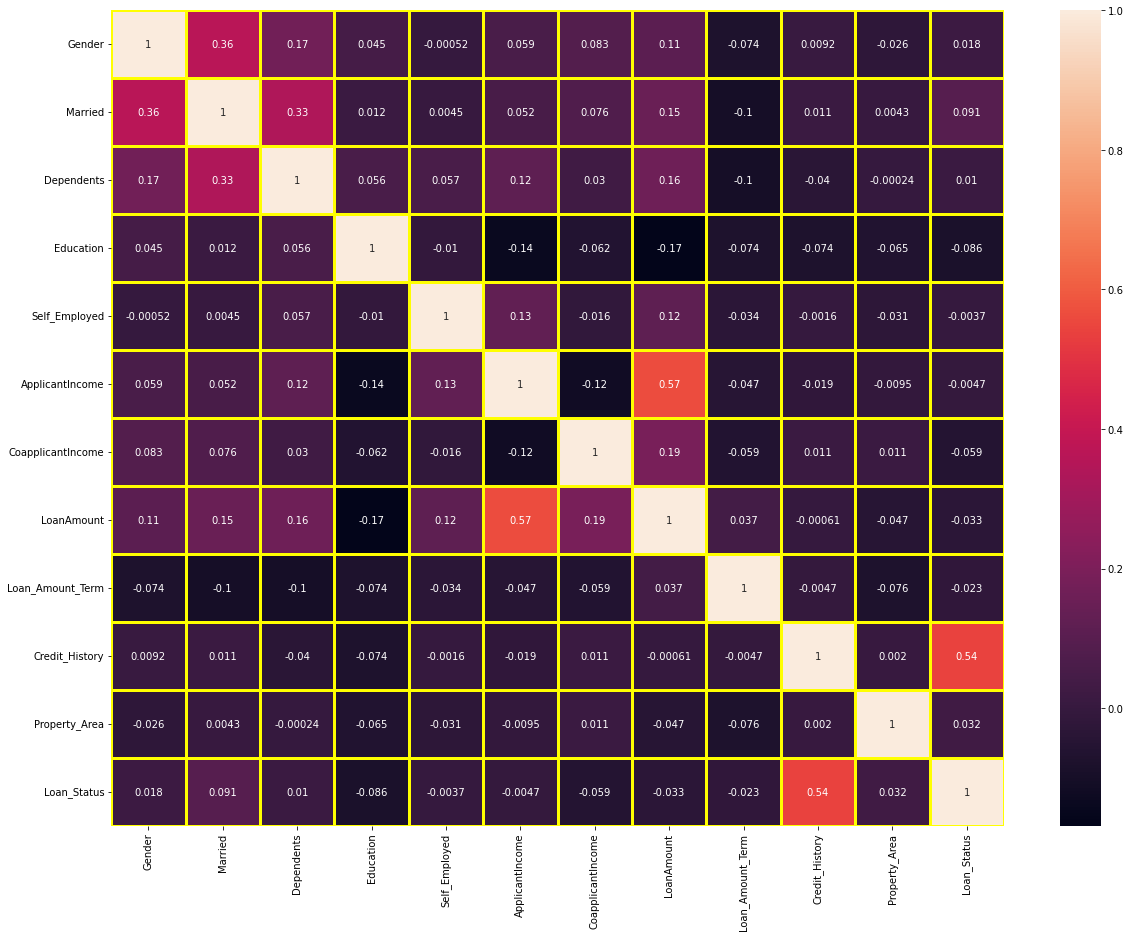

In [107]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

In [108]:
# Observations:

# 1) Credithistory has the max correlation with loan_status.

# 2) All the features data are poorly correlated with loan_status.

# 3) Loan amount and applicant income is correlated to each other.

# Correlation with Other features with Loan_Status:

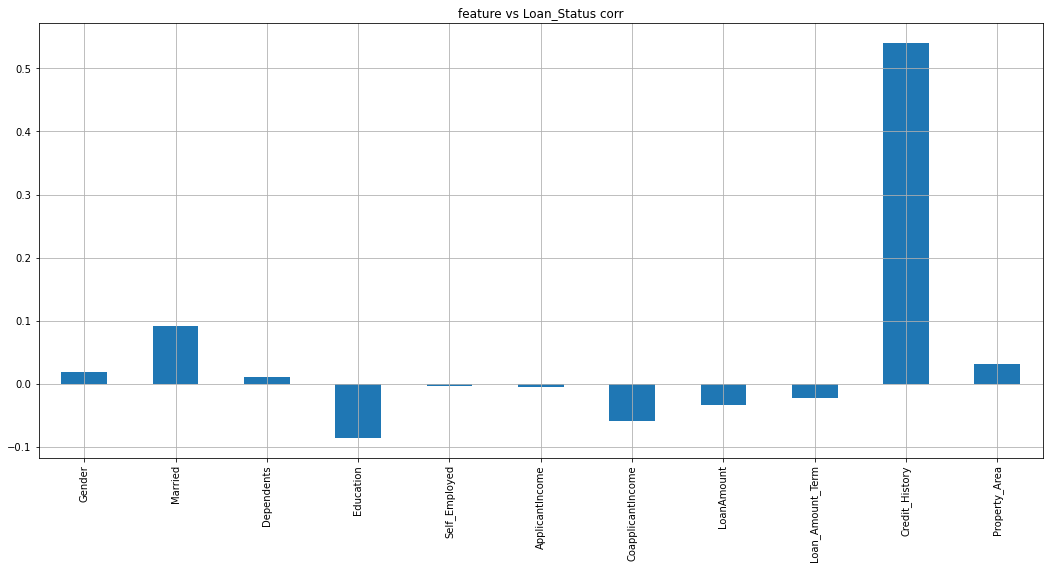

In [109]:
data.drop("Loan_Status", axis=1).corrwith(data["Loan_Status"]).plot(kind='bar',
        figsize=(18,8),grid='True',title='feature vs Loan_Status corr')
plt.show()

# Outliers Detection and Removal:

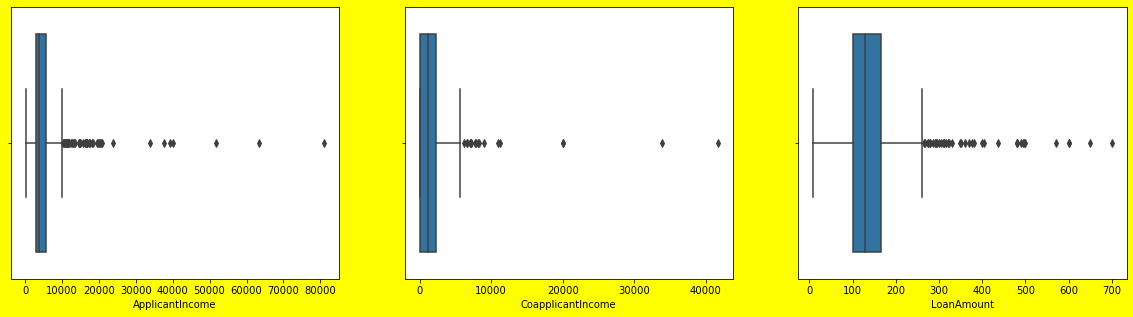

In [110]:
plt.figure(figsize=(20,5),facecolor='yellow')
plotnumber=1
data_num = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]
for x in data_num:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(data_num[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

ApplicantIncome         AxesSubplot(0.125,0.125;0.227941x0.755)
CoapplicantIncome    AxesSubplot(0.398529,0.125;0.227941x0.755)
LoanAmount           AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

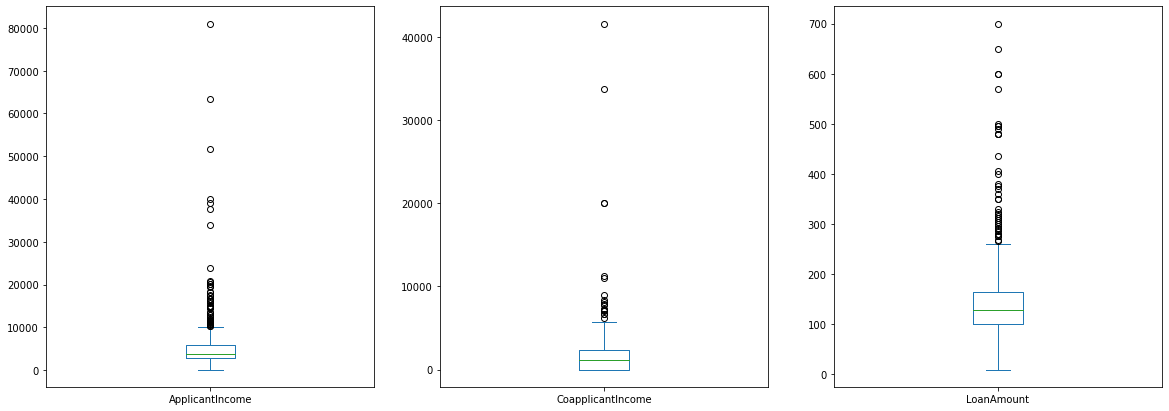

In [111]:
data_num.plot(kind ='box', subplots =True , layout =(1,3), figsize = (20,7))

In [112]:
# Observations :

# From the previous Boxplot , it is seen that there is outiers in featues columns. Let's remove it.

# Outliers removal by Z score:

In [113]:
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604]), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7]))


In [114]:
data1 = data[(z<3).all(axis = 1)]
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [115]:
data1.shape

(577, 12)

In [116]:
data.shape

(614, 12)

In [117]:
print ("Percentage of data loss",((data.shape[0]- data1.shape[0])/data.shape[0])*100, "%")

Percentage of data loss 6.026058631921824 %


# Correlation after encoding data:

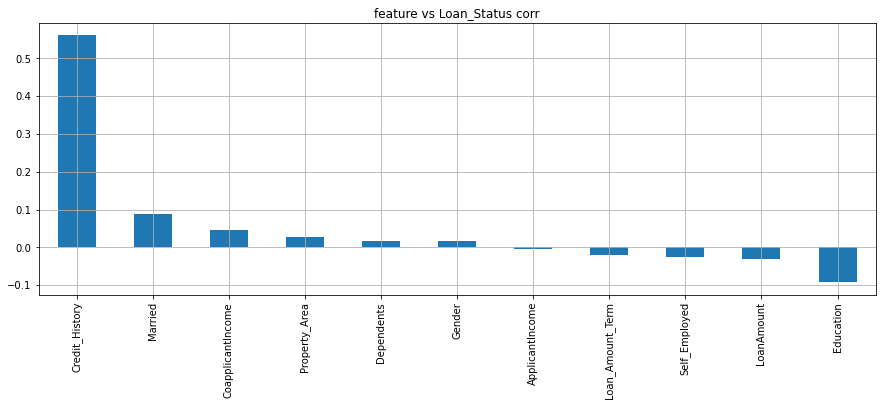

In [118]:
data1.drop("Loan_Status", axis=1).corrwith(data1["Loan_Status"]).sort_values(ascending=False) .plot(kind='bar',
                    figsize=(15,5),grid='True',title='feature vs Loan_Status corr')
plt.show()

# Skewness:

In [119]:
data1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [120]:
# Observation :

# For Numarical data, ApplicantIncome, CoapplicantIncome and LoanAmount have a lot of skewness.

# Data Balancing:

In [121]:
# Let's balance the target variable Income by appropiate method

In [122]:
#0 means N
#1 means Y
data1['Loan_Status'].value_counts() 

1    398
0    179
Name: Loan_Status, dtype: int64

In [123]:
# Let's balance it by oversampling.

# Using SMOTE:

In [124]:
from imblearn.over_sampling import SMOTE
over = SMOTE()

In [125]:
# splitting data in target and dependent feature
x = data1.drop(['Loan_Status'], axis =1)
y = data1['Loan_Status']
x,y = over.fit_resample(x,y)
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Checking Multicollinearity:

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data1.values,i)for i in range(data1.shape[1])]
vif["Features"] = data1.columns
vif

,VIF,Features
0,6.202882,Gender
1,3.824026,Married
2,1.786879,Dependents
3,1.329476,Education
4,1.227048,Self_Employed
5,5.460936,ApplicantIncome
6,2.511797,CoapplicantIncome
7,11.335900,LoanAmount
8,13.246544,Loan_Amount_Term
9,9.538848,Credit_History


In [127]:
# Observation:

# No such multicollinearity is present between different features.

# Remove skewness:

In [128]:
skew_data = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [129]:
data1[skew_data] = scaler.fit_transform(data1[skew_data].values)
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


In [130]:
data1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

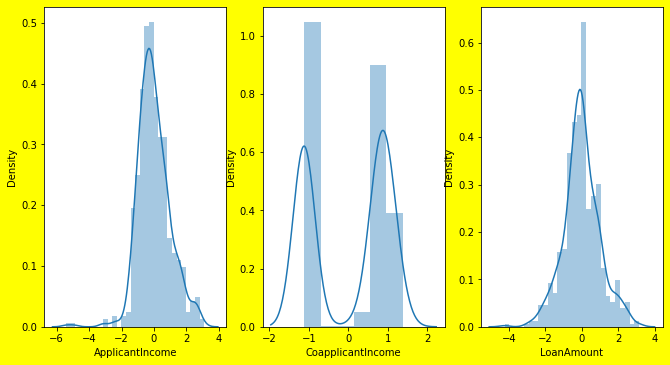

In [131]:
plt.figure(figsize=(15,20),facecolor='yellow')
plotnumber=1
for x in skew_data:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data1[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

# Data Scaling:

In [132]:
df= data1.copy()

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x = data1.drop(['Loan_Status'], axis =1)
y = data1['Loan_Status']

In [134]:
x_scale = scaler.fit_transform(x)

# Final predictions using different Classification ML Models for Loan_Status:

# Find best Random state:

In [135]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(0,1500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.9103448275862069 on Random_state 494


In [136]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (432, 11)
Training target shape: (432,)
Test feature shape: (145, 11)
Test target shape: (145,)


# Using LogisticRegression():

In [137]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=494)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.9103448275862069
cof_mat:
  [[ 19  13]
 [  0 113]]
classification report:
                precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

-----------
-----------
training score :  0.7893518518518519
testing score :  0.9103448275862069


# Use GridSearchCV for hyperparameter tuning:

In [138]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1', 'elasticnet', 'none'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80,90], multi_class=['auto', 'ovr', 'multinomial'])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 1.0, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


In [139]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.9103448275862069
cof_mat:
  [[ 19  13]
 [  0 113]]
classification report:
                precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

-----------
-----------
training score :  0.7870370370370371
testing score :  0.9103448275862069


In [140]:
# Observations:

# R2 score Not improved after using gridsearchCV.

# Using DecisionTreeClassifier()

In [149]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.8068965517241379


cof_mat:  [[24  8]
 [20 93]]


classification report: 

               precision    recall  f1-score   support

           0       0.55      0.75      0.63        32
           1       0.92      0.82      0.87       113

    accuracy                           0.81       145
   macro avg       0.73      0.79      0.75       145
weighted avg       0.84      0.81      0.82       145

-----------
-----------
training score :  1.0
testing score :  0.8068965517241379


# Use GridSearchCV for hyperparameter tuning:

In [150]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10, 0.0001,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=7, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'random'}


In [151]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))


accu score :  0.9103448275862069


cof_mat:  [[ 19  13]
 [  0 113]]


classification report: 

               precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

-----------
-----------
training score :  0.7870370370370371
testing score :  0.9103448275862069


In [152]:
# Observations:

# Accuracy score is improved after using GridSearchCV with DecisionTreeClassifier().

# But interesting the difference between training score, 
#testing score is increased and training score is less than testing

# Using GradientBoostingClassifier():

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.8896551724137931


cof_mat:  [[ 21  11]
 [  5 108]]


classification report: 

               precision    recall  f1-score   support

           0       0.81      0.66      0.72        32
           1       0.91      0.96      0.93       113

    accuracy                           0.89       145
   macro avg       0.86      0.81      0.83       145
weighted avg       0.89      0.89      0.89       145

-----------
-----------
training score :  0.8888888888888888
testing score :  0.8896551724137931


# Using Gridsearch CV:

In [154]:
param= {"min_samples_split" : [2,3,4], "learning_rate": [0.1,0.01,1.0, 0.001,0.5], 
        "min_samples_leaf" :[1,2,3],"loss" :['log_loss', 'deviance', 'exponential'], "criterion":['friedman_mse', 'squared_error', 'mse'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)


best params :  {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'exponential', 'min_samples_leaf': 3, 'min_samples_split': 2}


In [155]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.9103448275862069


cof_mat:  [[ 19  13]
 [  0 113]]


classification report:

                precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

-----------
-----------
training score :  0.7870370370370371
testing score :  0.9103448275862069


In [156]:
# Observations:

# Accuracy score, testing score are improved after using GridSearchCV with GradientBoostingClassifier()

# Using RandomForestClassifier()

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.896551724137931


cof_mat:  [[ 21  11]
 [  4 109]]


classification report:                precision    recall  f1-score   support

           0       0.84      0.66      0.74        32
           1       0.91      0.96      0.94       113

    accuracy                           0.90       145
   macro avg       0.87      0.81      0.84       145
weighted avg       0.89      0.90      0.89       145

-----------
-----------
training score :  1.0
testing score :  0.896551724137931


# Use GridSearchCV for hyperparameter tuning:

In [158]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3], 'min_samples_split': [2,5,4],
          'criterion' : ["gini", "entropy","log_loss"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 80}


In [159]:
grid_rf_best = rf_grd.best_estimator_
grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.903448275862069


cof_mat:  [[ 19  13]
 [  1 112]]


classification report: 
               precision    recall  f1-score   support

           0       0.95      0.59      0.73        32
           1       0.90      0.99      0.94       113

    accuracy                           0.90       145
   macro avg       0.92      0.79      0.84       145
weighted avg       0.91      0.90      0.89       145

-----------
-----------
training score :  0.8425925925925926
testing score :  0.903448275862069


In [160]:
# Observations:

# Accuracy score is slightly improved after using GridSearchCV with RandomForestClassifier().

# ExtraTreesClassifier():

In [161]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.8758620689655172


cof_mat:  [[ 21  11]
 [  7 106]]


classification report:                precision    recall  f1-score   support

           0       0.75      0.66      0.70        32
           1       0.91      0.94      0.92       113

    accuracy                           0.88       145
   macro avg       0.83      0.80      0.81       145
weighted avg       0.87      0.88      0.87       145

-----------
-----------
training score :  1.0
testing score :  0.8758620689655172


# Use GridSearchCV for hyperparameter tuning:

In [162]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3], 'min_samples_split': [2,5,4],
          'criterion' : ["gini", "entropy","log_loss"],"ccp_alpha":[0, 0.001, 0.01] }

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'ccp_alpha': 0.01, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [163]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.9103448275862069


cof_mat:  [[ 19  13]
 [  0 113]]


classification report: 
               precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

-----------
-----------
training score :  0.7870370370370371
testing score :  0.9103448275862069


In [164]:
# Observations:

# Accuracy score is slightly improved after using GridSearchCV with ExtraTreesClassifier()

# Using AdaBoostClassifier:

In [165]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.8689655172413793


cof_mat:  [[ 20  12]
 [  7 106]]


classification report:                precision    recall  f1-score   support

           0       0.74      0.62      0.68        32
           1       0.90      0.94      0.92       113

    accuracy                           0.87       145
   macro avg       0.82      0.78      0.80       145
weighted avg       0.86      0.87      0.86       145

-----------
-----------
training score :  0.8263888888888888
testing score :  0.8689655172413793


# Using GridSearchCV for hyperparameter tuning:

In [166]:
params = {'n_estimators' : [50,40,70, 75, 45], 'learning_rate': [1,0.1,0.01,0.5,0.15, 0.001, 0.002, 0.05,]}

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.01, 'n_estimators': 50}


In [167]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.9103448275862069


cof_mat:  [[ 19  13]
 [  0 113]]


classification report: 
               precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

-----------
-----------
training score :  0.7870370370370371
testing score :  0.9103448275862069


In [168]:
# Observations:

# Accuracy score is improved after using GridSearchCV with AdaBoostClassifier().

# Using SVC('rbf'):

In [169]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))


In [170]:
svmkernel('rbf')

accu score :  0.9103448275862069


cof_mat:  [[ 19  13]
 [  0 113]]


classification report: 

               precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

-----------
-----------
training score :  0.7870370370370371
testing score :  0.9103448275862069


# Using SVC('poly')

In [171]:
svmkernel('poly')

accu score :  0.7793103448275862


cof_mat:  [[  0  32]
 [  0 113]]


classification report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.78      1.00      0.88       113

    accuracy                           0.78       145
   macro avg       0.39      0.50      0.44       145
weighted avg       0.61      0.78      0.68       145

-----------
-----------
training score :  0.6597222222222222
testing score :  0.7793103448275862


# Using SVC('linear')

In [172]:
svmkernel('linear')

accu score :  0.9103448275862069


cof_mat:  [[ 19  13]
 [  0 113]]


classification report: 

               precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

-----------
-----------
training score :  0.7870370370370371
testing score :  0.9103448275862069


In [173]:
# Observations:

# Let's take svmkernel('linear').

# Cross validations:

In [174]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "linear"))])

all_models = [grid_log_best, grid_clf_best, grid_gbdt_best, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =9)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression(penalty='l1', solver='liblinear')

 Cross Validation Score :  [0.81538462 0.828125   0.78125    0.765625   0.796875   0.828125
 0.859375   0.796875   0.890625  ]

Mean CV Score : 0.8180288461538461

Std deviation : 0.03679429246617993

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_features='log2',
                       splitter='random')

 Cross Validation Score :  [0.81538462 0.796875   0.78125    0.765625   0.765625   0.828125
 0.75       0.71875    0.890625  ]

Mean CV Score : 0.7902510683760684

Std deviation : 0.04738892217627296

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           min_samples_leaf=3)

 Cross Validation Score :  [0.81538462 0.828125   0.78125    0.75       0.796875   0.828125
 0.859375   0.796875   0.890625  ]

Mean CV Score : 0.816292735042735

Std deviat

In [175]:
# Observations:

# SVM('Linear'), AdaBoostClassifier and ExtraTreesClassifier have the same Mean CV Score and Std deviation.

# Let's plot AUC-ROC Curve.

# Plotting ROC AUC Curve to choose best model

In [176]:
grid_log_best.fit(x_train, y_train)
grid_clf_best.fit(x_train, y_train)
grid_gbdt_best.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_etc_best.fit(x_train, y_train)
grid_ada_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [177]:
grid_log_best.fit(x_test, y_test)
clf.fit(x_test, y_test)
grid_gbdt_best.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_etc_best.fit(x_test, y_test)
grid_ada_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


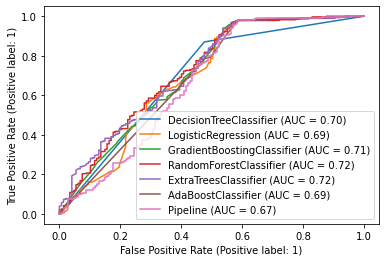

In [178]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_train, y_train)

plot_roc_curve(grid_log_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

# According to the above plot, the best AUC of training is for GradientBoostingClassifier, Randomforest Classifier and ExtraTrees Classifier

In [179]:
# Let's check it by AUC plot of testing.

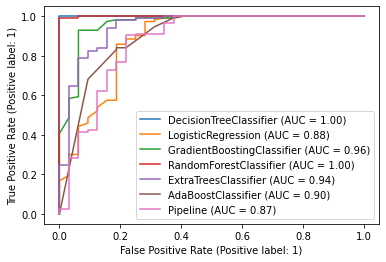

In [180]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_test, y_test)

plot_roc_curve(grid_log_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()


In [181]:
# Observations:

# Observing all AUC curve, ExtraTrees Classifier s the best model.



# So here the best model is ExtraTreesClassifiers()


# Final Model:

In [182]:
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.9103448275862069


cof_mat:  [[ 19  13]
 [  0 113]]


classification report: 
               precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

-----------
-----------
training score :  0.7870370370370371
testing score :  0.9103448275862069


# Confusion matrix of final model:

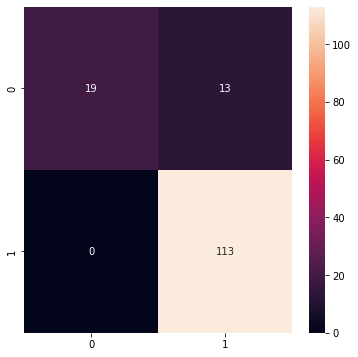

In [183]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

# Load and save the model

In [184]:
import pickle
pickle.dump(grid_etc_best, open("Loan_Application_Classification_model", "wb"))
load_Loan_Application_Classification_model= pickle.load(open("Loan_Application_Classification_model", "rb"))

In [185]:
y_pred = load_Loan_Application_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
58,1,1
136,1,1
87,1,1
16,1,1
93,1,1
61,1,1


In [186]:
feature= x.columns

In [189]:
fimp = list(zip(feature,grid_etc_best.feature_importances_))
fimp

[('Gender', 0.002032832679698458),
 ('Married', 0.014883751480966842),
 ('Dependents', 0.0010605911546857463),
 ('Education', 0.006954002892848643),
 ('Self_Employed', 0.0005554777468821121),
 ('ApplicantIncome', 0.00311813132922548),
 ('CoapplicantIncome', 0.005882500015774954),
 ('LoanAmount', 0.005160391992421057),
 ('Loan_Amount_Term', 0.007175210323414017),
 ('Credit_History', 0.9305108677500471),
 ('Property_Area', 0.022666242634035636)]

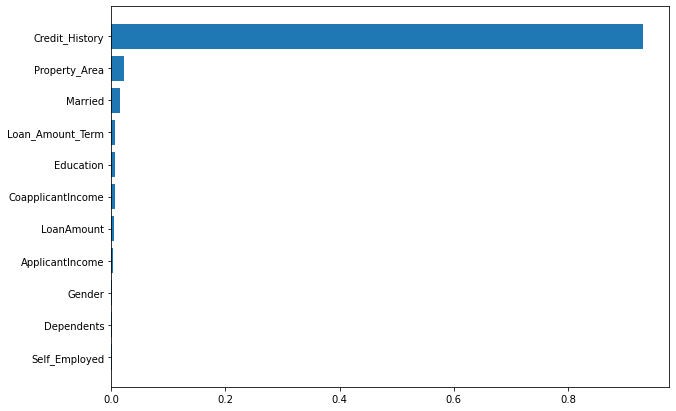

In [190]:
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

In [191]:
# Observation:

# Credit_histry is the most important feature among all